<a href="https://colab.research.google.com/github/AdrianRamos956/Homeworks/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 code skeleton

Code for Q1-Q7.

#### % import necessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from numpy import diag
import scipy.stats

#### % load the data and setup some variables

data is a numpy ndarray of shape (3,41,12) for the three diseases, 41 years and 12 months

In [ ]:
diseases = ['Measles', 'Mumps', 'ChickenPox']
year = np.arange(1931, 1972)
month = np.arange(1, 13)
month_str = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')


url = 'diseases.csv'
# uncomment the following to read directly from github
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/' + url
data = pd.read_csv(url,header=None).values
data = data.reshape([3, 41, 12]) #data[0], data[1], and data[2] is for measles, mumps, and chickenpox
#print(data[0])

### % Q1 calucate and show mean number of cases per year, and 95% CI of the mean

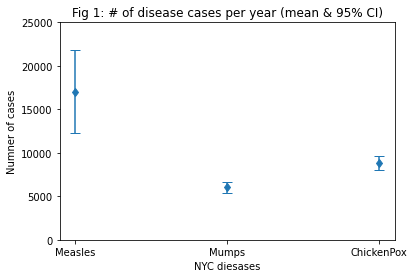

In [ ]:
plt.figure()
plt.title('Fig 1: # of disease cases per year (mean & 95% CI)')

Measles = data[0]
Mumps = data[1]
ChickenPox = data[2]

SumMeasles= Measles.sum(axis = 1)
SumMumps= Mumps.sum(axis = 1)
SumChickenPox= ChickenPox.sum(axis = 1)

MeanMeasles= SumMeasles.mean(axis = 0)
MeanMumps= SumMumps.mean(axis = 0)
MeanChickenPox= SumChickenPox.mean(axis = 0)

MeanAll = MeanMeasles, MeanMumps, MeanChickenPox

Y = 1, 2,  3

MeaslesSEM = 1.96 * (np.std(SumMeasles)/sqrt(41))
MumpsSEM = 1.96 * (np.std(SumMumps)/sqrt(41))
ChickenPoxSEM = 1.96 * (np.std(SumChickenPox)/sqrt(41))

CL = MeaslesSEM, MumpsSEM, ChickenPoxSEM

plt.errorbar(Y, MeanAll, yerr = CL, marker='d', linestyle='', capsize=5)

plt.xticks([1,2,3],['Measles', 'Mumps', 'ChickenPox'])

plt.xlabel("NYC diesases")
plt.ylabel("Numner of cases")

plt.ylim([0, 25000])

plt.show()

### % Q2 calucate and show percent of cases occurred in each month


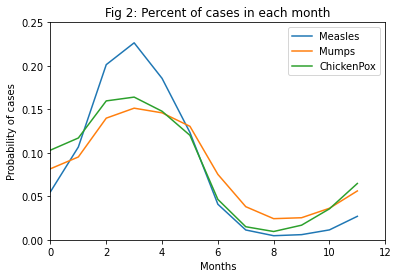

In [ ]:
plt.figure()

n = len(year)

fraction = [sum(data[0]) / sum(sum(data[0])), sum(data[1]) / sum(sum(data[1])), sum(data[2]) / sum(sum(data[2]))]

plt.xlabel("Months")
plt.ylabel("Probability of cases")
plt.ylim(0.0,.25, .05)
plt.xlim(0,12,2)
plt.plot(fraction[0])
plt.plot(fraction[1])
plt.plot(fraction[2])
plt.legend(diseases)

plt.title('Fig 2: Percent of cases in each month')
plt.show()


### % Q3 Scatter plot and correlation, mean monthly cases of Measles vs mumps

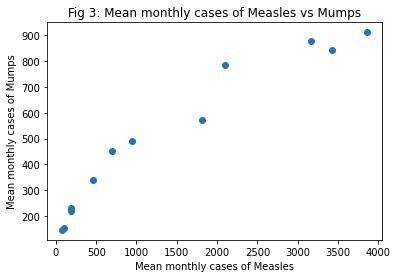

Pearson corr: 0.9638
Spearman corr: 0.9860


In [ ]:
# Q3.1 scatter plot
ind1 = 0
ind2 = 1

plt.figure()

plt.title('Fig 3: Mean monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))

TempMeasles = data[ind1]
TempMumps = data[ind2]

Measles = TempMeasles.mean(axis = 0)
Mumps = TempMumps.mean(axis = 0)

plt.scatter(Measles, Mumps)

plt.xlabel("Mean monthly cases of Measles")
plt.ylabel("Mean monthly cases of Mumps")

# Q3.2 Pearson correlation
MeaslesVMumpsPearson = np.corrcoef(Measles, Mumps)
# Q3.2 Spearman correlation coefficient
Measles_rank = np.argsort(np.argsort(Measles))
Mumps_rank = np.argsort(np.argsort(Mumps))
np.corrcoef(Measles_rank, Mumps_rank)[0,1]


plt.show()

print('Pearson corr: %.4f' %MeaslesVMumpsPearson[1][0])
print('Spearman corr: %.4f' %np.corrcoef(Measles_rank, Mumps_rank)[0,1])


### % Q4 Scatter plot and correlation, annual cases of measles vs mumps

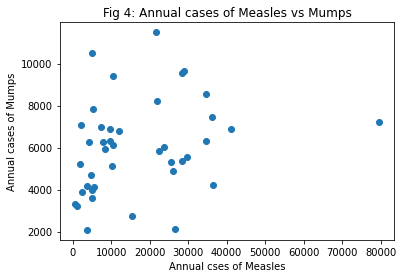

Pearson correlation: 0.2597
Spearman correlation: 0.3808 


In [ ]:
# 4.1 scatter plot

ind1 = 0
ind2 = 1

plt.figure()
plt.title('Fig 4: Annual cases of %s vs %s' %(diseases[ind1], diseases[ind2]))

TempMeasles = data[ind1]
TempMumps = data[ind2]

Measles = TempMeasles.sum(axis = 1)
Mumps = TempMumps.sum(axis = 1)

plt.scatter(Measles, Mumps)

plt.xlabel("Annual cses of Measles")
plt.ylabel("Annual cases of Mumps")

# 4.2 Pearson correlation coefficient
MeaslesVMumpsPearson = np.corrcoef(Measles, Mumps)
# 4.3 Spearman correlation
Measles_rank = np.argsort(np.argsort(Measles))
Mumps_rank = np.argsort(np.argsort(Mumps))
np.corrcoef(Measles_rank, Mumps_rank)[0,1]

plt.show()

print('Pearson correlation: %.4f' %MeaslesVMumpsPearson[1][0])
print('Spearman correlation: %.4f ' %np.corrcoef(Measles_rank, Mumps_rank)[0,1])


### % Q5 Scatter plot and correlation, monthly cases of Measles vs mumps

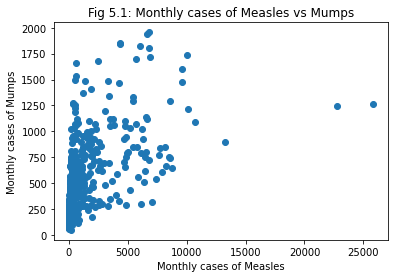

Pearson correlation in orignal space: 0.6579
Spearman correlation in original space: 0.6434 


In [ ]:
# 5.1 scatter plot and correlation in original space

plt.figure()

ind1 = 0
ind2 = 1

plt.title('Fig 5.1: Monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))

Measles = data[ind1]
Mumps = data[ind2]
plt.scatter(Measles, Mumps)

plt.xlabel("Monthly cases of Measles")
plt.ylabel("Monthly cases of Mumps")

# Pearson correlation coefficient
MeaslesVMumpsPearson = np.corrcoef(Measles, Mumps)
# Spearman correlation between annual cases of mumps vs chicken pox
Measles_rank = np.argsort(np.argsort(Measles))
Mumps_rank = np.argsort(np.argsort(Mumps))
np.corrcoef(Measles_rank, Mumps_rank)[0,1]

plt.show()

print('Pearson correlation in orignal space: %.4f' %MeaslesVMumpsPearson[1][0])
print('Spearman correlation in original space: %.4f ' %np.corrcoef(Measles_rank, Mumps_rank)[0,1])


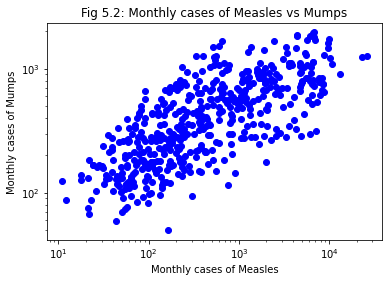

Pearson correlation in log space: 0.6579
Spearman correlation in log space: 0.6434 


In [ ]:
# 5.2 scatter plot and correlation in log space

fig = plt.figure()
ax = plt.gca()

ind1 = 0
ind2 = 1

plt.title('Fig 5.2: Monthly cases of %s vs %s' %(diseases[ind1], diseases[ind2]))

Measles = data[ind1]
Mumps = data[ind2]

ax.plot(Measles, Mumps, 'o', c='blue')


gaga = ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel("Monthly cases of Measles")
plt.ylabel("Monthly cases of Mumps")

# Pearson correlation coefficient
MeaslesVMumpsPearson = np.corrcoef(Measles, Mumps)
# Spearman correlation
Measles_rank = np.argsort(np.argsort(Measles))
Mumps_rank = np.argsort(np.argsort(Mumps))
np.corrcoef(Measles_rank, Mumps_rank)[0,1]

plt.show()

print('Pearson correlation in log space: %.4f' %MeaslesVMumpsPearson[1][0])
print('Spearman correlation in log space: %.4f ' %np.corrcoef(Measles_rank, Mumps_rank)[0,1])



### % Q6 (bonus) Correlation between number of mumps cases in different months

###% Q7 (Bonus) calculate and show average perecent of diseases occurred in each month